In [1]:
import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

In [2]:
digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape(n_samples, -1)


In [3]:
import pandas as pd

Y=pd.get_dummies(digits.target).values
X=data

In [4]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
Y

array([[ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False,  True, False]])

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((1437, 64), (360, 64), (1437, 10), (360, 10))

In [25]:

#모델 생성

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(128,input_shape=(X_train.shape[1],),activation='relu')) #imput_shape->입력층, 여기서는 64(X_train.shape[1])
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax')) #다층 퍼셉트론 -> softmax / 퍼셉트론 -> sigmoid, 출력층은 class갯수가 되도록

model.compile(Adam(learning_rate=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,354 (75.60 KB)

 Trainable params: 19,354 (75.60 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
import numpy as np
#x는 학습 데이터, y는 학습데이터 출력(타겟), epochs는 전체 학습데이터를 몇번할지, batch_size는 한번에 학습시킬 개수,validation_data는 검증시킬 데이터(모델 성능 평가)
model_history=model.fit(x=X_train, y=y_train, epochs=40, batch_size=50,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1271 - loss: 4.6269 - val_accuracy: 0.0750 - val_loss: 2.3024
Epoch 2/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0948 - loss: 2.3126 - val_accuracy: 0.0806 - val_loss: 2.3064
Epoch 3/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1100 - loss: 2.3030 - val_accuracy: 0.0806 - val_loss: 2.3102
Epoch 4/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1063 - loss: 2.3011 - val_accuracy: 0.0806 - val_loss: 2.3094
Epoch 5/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0958 - loss: 2.3030 - val_accuracy: 0.0806 - val_loss: 2.3104
Epoch 6/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0951 - loss: 2.3048 - val_accuracy: 0.0833 - val_loss: 2.3077
Epoch 7/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1137 - loss: 2.3020 - val_accuracy: 0.0750 - val_loss: 2.3116
Epoch 8/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1054 - loss: 2.3034 - val_accuracy: 0.0806 - val_loss:

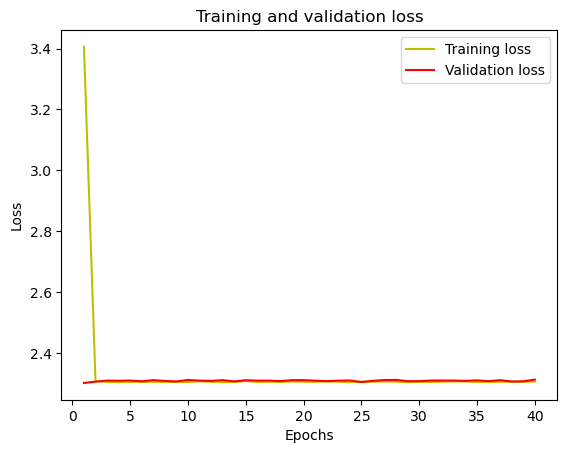

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

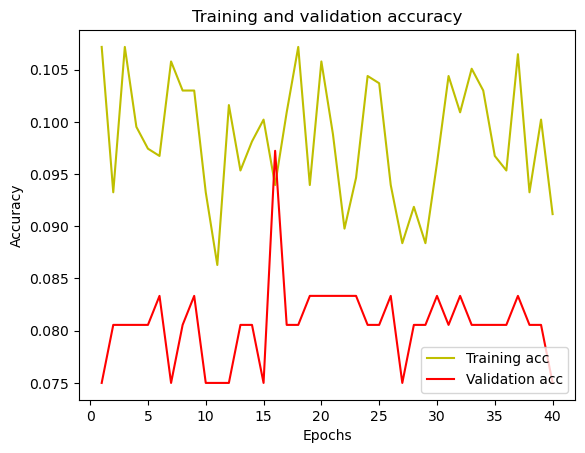

In [28]:

acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [29]:

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.07      1.00      0.14        27
           1       0.00      0.00      0.00        35
           2       0.00      0.00      0.00        36
           3       0.00      0.00      0.00        29
           4       0.00      0.00      0.00        30
           5       0.00      0.00      0.00        40
           6       0.00      0.00      0.00        44
           7       0.00      0.00      0.00        39
           8       0.00      0.00      0.00        39
           9       0.00      0.00      0.00        41

    accuracy                           0.07       360
   macro avg       0.01      0.10      0.01       360
weighted avg       0.01      0.07      0.01       360

[[27  0  0  0  0  0  0  0  0  0]
 [35  0  0  0  0  0  0  0  0  0]
 [36  0  0  0  0  0  0  0  0  0]
 [29  0  0  0  0  0  0  0  0  0]
 [30  0  0  0  0  0  0  0  0  0]
 [40  0  0  0  0  0  0  0  0  0]
 [44  0  0  0  0  0  0  0  0  0]
 [39  0  0

C:\Users\tpfzl\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tpfzl\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tpfzl\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
